In [ ]:
import pandas as pd

# CSV dosyasını yükleme
df = pd.read_csv('transaction_updated.csv')

# İlk beş satırı göstererek veriler hakkında bilgi edinme
(df.head())

# Sütun adlarını yazdırma
(df.columns)


Index(['TransactionID', 'CustomerID', 'TransactionType', 'Amount',
       'TransactionDate', 'Description', 'UpdatedBalance'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt

# İşlem türlerine göre toplam tutarları hesaplama
type_totals = df.groupby('TransactionType')['Amount'].sum()

# Pasta grafiği çizdirme
plt.figure(figsize=(10, 8))
plt.pie(type_totals, labels=type_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('İşlem Türlerine Göre Harcamaların Dağılımı')
plt.show()


NameError: name 'df' is not defined

In [ ]:
# TransactionType sütunundaki benzersiz değerleri görüntüle
print("İşlem Türleri:", df['TransactionType'].unique())

# Gelir ve gider örneklerini görüntüle
print("\nİşlem Türüne Göre Örnek Veriler:")
print(df[['TransactionType', 'Amount']].head(20))


İşlem Türleri: ['Purchase' 'IncomingTransfer' 'Payment' 'Withdrawal' 'OutgoingTransfer'
 'Deposit' 'Return' 'OnlineShopping']

İşlem Türüne Göre Örnek Veriler:
                      TransactionType   Amount
TransactionDate                               
2024-01-29 19:28:00          Purchase    27.03
2024-02-05 21:28:00  IncomingTransfer  2700.00
2024-02-10 21:28:00           Payment   900.00
2024-02-11 10:28:00        Withdrawal    52.13
2024-02-18 11:28:00  OutgoingTransfer   146.98
2024-02-18 21:28:00           Payment   900.00
2024-02-21 15:28:00           Deposit    40.69
2024-02-29 23:28:00          Purchase   140.45
2024-03-04 21:28:00  IncomingTransfer  2700.00
2024-03-09 21:28:00           Payment   800.00
2024-03-09 22:28:00            Return   216.01
2024-03-11 21:28:00           Payment  1000.00
2024-03-13 12:28:00    OnlineShopping   185.02
2024-03-22 17:28:00        Withdrawal    96.39
2024-03-27 20:28:00        Withdrawal    98.29
2024-03-31 12:28:00           Deposit    

In [ ]:
# Sütun adlarını yazdırma
print(df.columns)


Index(['TransactionID', 'CustomerID', 'TransactionType', 'Amount',
       'Description', 'UpdatedBalance'],
      dtype='object')


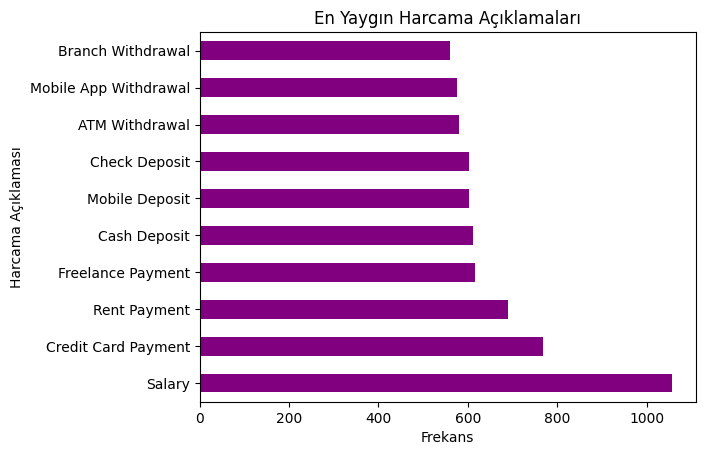

In [ ]:
description_counts = df['Description'].value_counts().head(10)

description_counts.plot(kind='barh', color='purple')
plt.title('En Yaygın Harcama Açıklamaları')
plt.xlabel('Frekans')
plt.ylabel('Harcama Açıklaması')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



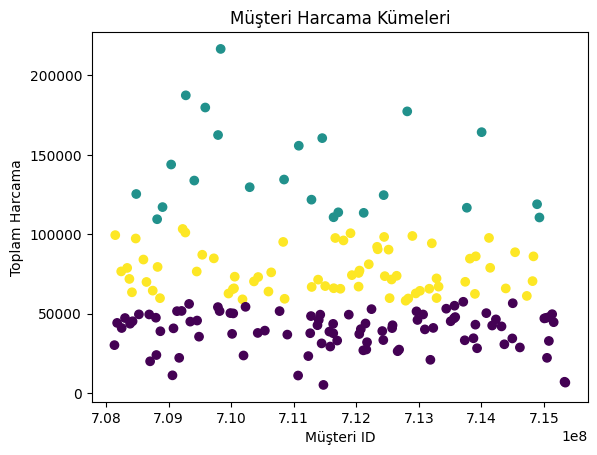

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Müşteri bazında toplam harcamaları hesaplama ve kümeleme
df['TotalSpending'] = df.groupby('CustomerID')['Amount'].transform(sum)
X = df[['CustomerID', 'TotalSpending']].drop_duplicates().set_index('CustomerID')
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X['Cluster'] = kmeans.labels_

# Küme sonuçlarını görselleştirme
plt.scatter(X.index, X['TotalSpending'], c=X['Cluster'])
plt.title('Müşteri Harcama Kümeleri')
plt.xlabel('Müşteri ID')
plt.ylabel('Toplam Harcama')
plt.show()


In [ ]:
(df.columns)

Index(['TransactionID', 'CustomerID', 'TransactionType', 'Amount',
       'Description', 'UpdatedBalance', 'TotalSpending'],
      dtype='object')

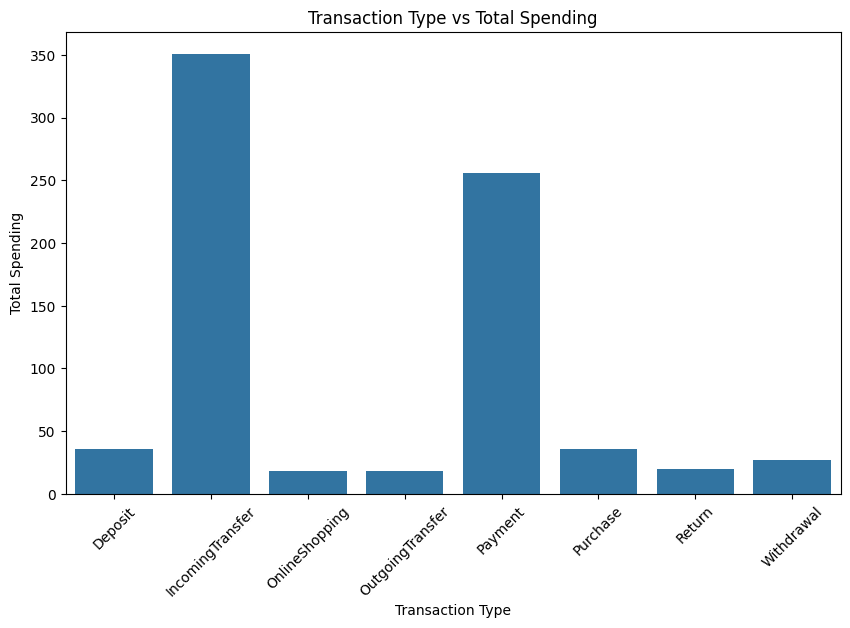

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# İşlem türüne göre toplam harcamaları hesaplama
type_totals = df.groupby('TransactionType')['Amount'].sum()

# Çubuk grafiği çizme
plt.figure(figsize=(10, 6))
sns.barplot(x=type_totals.index, y=type_totals.values)
plt.title('Transaction Type vs Total Spending')
plt.xlabel('Transaction Type')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)  # Etiketleri okunabilir yapmak için döndürme
plt.show()


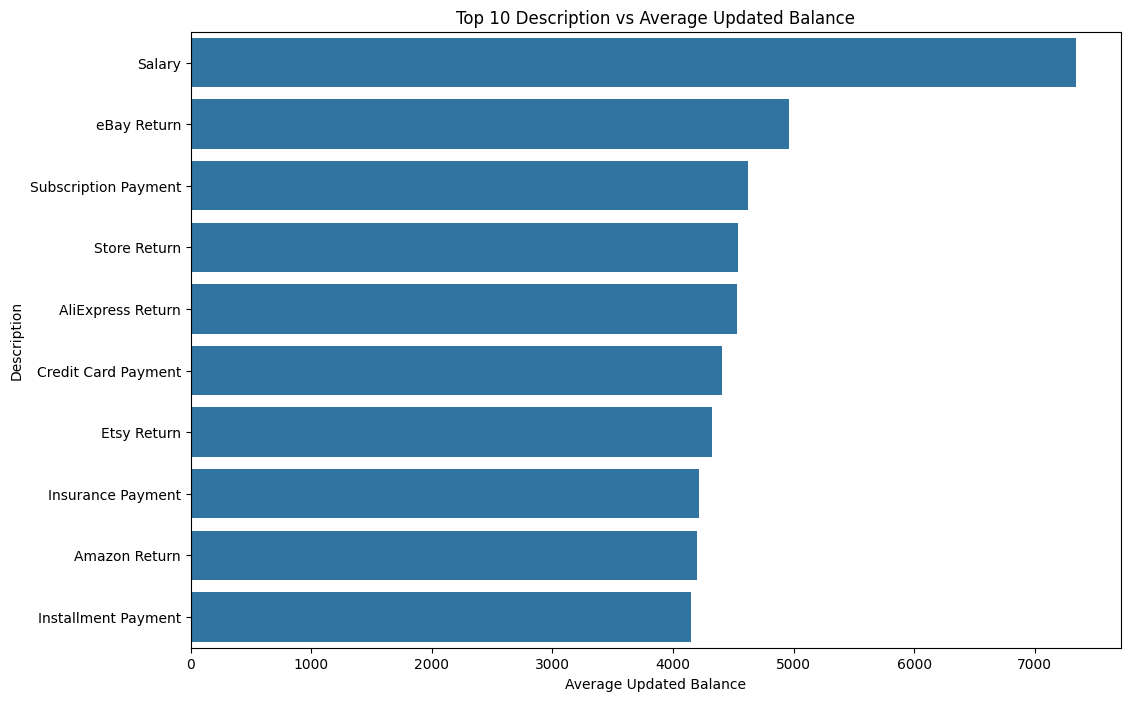

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Description'a göre UpdatedBalance ortalamalarını hesaplama
description_balance = df.groupby('Description')['UpdatedBalance'].mean().sort_values(ascending=False)

# Eğer çok fazla benzersiz değer varsa, en üst 10 tanesini seç
top_descriptions = description_balance.head(10)

# Çubuk grafiği çizdirme
plt.figure(figsize=(12, 8))
sns.barplot(x=top_descriptions.values, y=top_descriptions.index)
plt.title('Top 10 Description vs Average Updated Balance')
plt.xlabel('Average Updated Balance')
plt.ylabel('Description')
plt.show()
